In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


## EDA ##

In [2]:
dataset = pd.read_excel('/users/kamillaraki/Downloads/REDO-DATA.xlsx')

In [3]:
print(dataset.head())

   valve_1  valve_2  valve_3  valve_4  valve_5  valve_6  valve_7  origin
0        1        1       19       22        2       10        0       1
1        5        0       25       16        1       12        4       1
2        1        2       15       60        7       12        0       1
3        1        1        7       20        3        2        0       1
4        2        3       12       20        5        4        0       1


In [4]:
print(dataset.shape)
print(dataset.info())

(50, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   valve_1  50 non-null     int64
 1   valve_2  50 non-null     int64
 2   valve_3  50 non-null     int64
 3   valve_4  50 non-null     int64
 4   valve_5  50 non-null     int64
 5   valve_6  50 non-null     int64
 6   valve_7  50 non-null     int64
 7   origin   50 non-null     int64
dtypes: int64(8)
memory usage: 3.2 KB
None


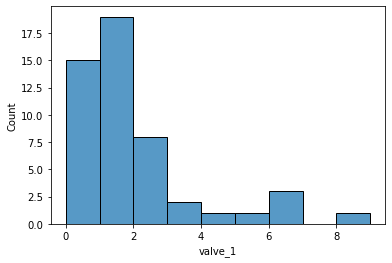

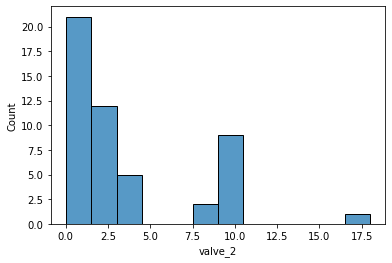

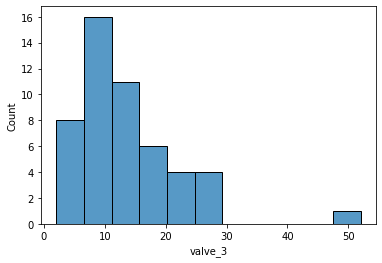

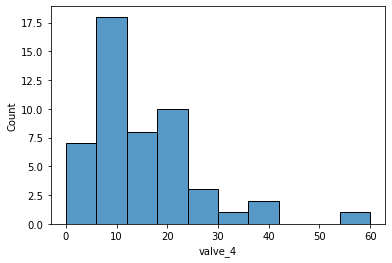

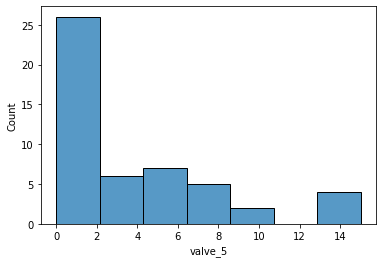

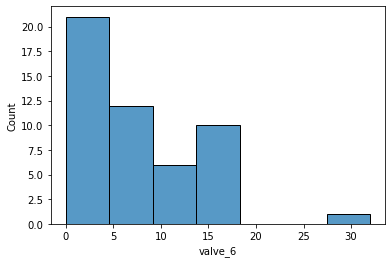

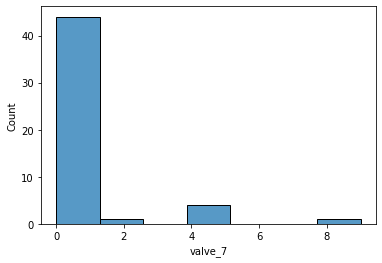

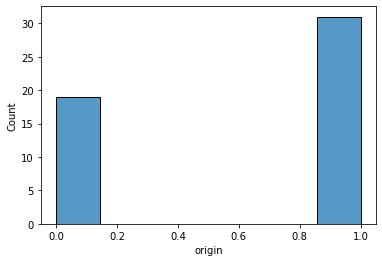

In [5]:
num_cols = dataset.select_dtypes(include=['int64']).columns.tolist()
for col in num_cols:
    sns.histplot(data=dataset, x=col)
    plt.show()

In [6]:
origin_counts = dataset['origin'].value_counts()

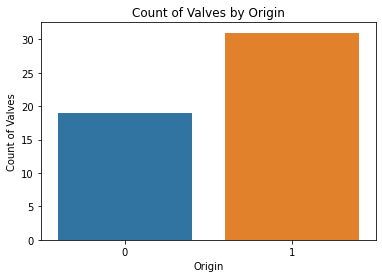

In [7]:
sns.barplot(x=origin_counts.index, y=origin_counts)
plt.title('Count of Valves by Origin')
plt.xlabel('Origin')
plt.ylabel('Count of Valves')
plt.show()

<AxesSubplot:>

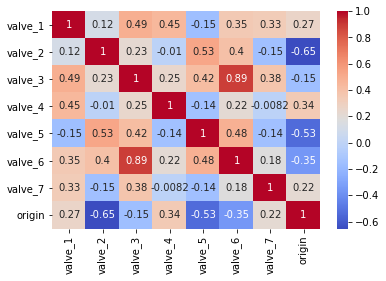

In [8]:
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True)

## LOGISTIC REGRESSION ##

In [9]:
# Split data into features and target
X = dataset.iloc[:, 0:7].values
y = dataset.iloc[:, -1].values

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Make predictions on testing set
y_pred = logreg.predict(X_test)

In [13]:
# Evaluate accuracy of predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [62]:
#Calculate precision
y_pred = logreg.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.9142857142857143


In [15]:
# Calculate the confusion matrix and ROC-AUC score
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print("Confusion Matrix:\n", cm)
print("ROC-AUC Score: {:.3f}".format(roc_auc))



Confusion Matrix:
 [[3 1]
 [0 6]]
ROC-AUC Score: 0.875


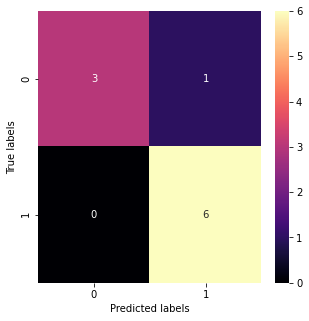

In [16]:
# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='magma')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [18]:
new_data = pd.read_excel('/users/kamillaraki/Downloads/REDO-D.xlsx')

In [19]:
# Drop the 'origin' column from the features to create X_new
X_new = new_data.drop('origin', axis=1)
# Set the 'origin' column as the target variable to create y_new
y_new = new_data['origin']

In [20]:
# Print the predictions
y_pred = logreg.predict(X_new)
print(y_pred)
y_pred_prob = logreg.predict_proba(X_new)[:, 1]
print(y_pred_prob)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 1]
[9.47286731e-01 9.99658452e-01 9.99950199e-01 9.93492090e-01
 9.61539398e-01 9.97677934e-01 9.99012288e-01 9.04327770e-01
 8.86922317e-01 7.03096610e-01 9.48874455e-01 8.72369709e-01
 9.45090345e-01 9.94520069e-01 7.55269090e-01 1.54863444e-07
 2.11395763e-03 9.98728707e-01 6.50690133e-01 9.99998705e-01
 9.52603296e-01 9.99384936e-01 4.46432668e-16 9.99722406e-01
 9.99931861e-01 9.88980714e-01 9.01563922e-01 8.70848562e-13
 9.99992567e-01 9.65124801e-01 9.97628326e-01 4.51315468e-05
 3.12693841e-03 9.99450366e-01 1.52571683e-05 2.41794987e-01
 7.97785805e-04 8.80315287e-01 8.38686898e-01 1.00340533e-02
 3.34525300e-01 5.42174970e-07 9.26246478e-03 5.54027158e-05
 2.52821324e-05 7.92858123e-04 2.00586637e-06 9.91662930e-01
 9.99991719e-01 9.77944258e-01]


/Users/kamillaraki/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/kamillaraki/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [21]:
# Evaluate predictions using accuracy score and roc_auc score
accuracyy = accuracy_score(y_new, y_pred)
roc_auc = roc_auc_score(y_new, y_pred_prob)

print("Test Accuracy: {:.3f}".format(accuracy))
print("ROC-AUC Score: {:.3f}".format(roc_auc))

Test Accuracy: 0.900
ROC-AUC Score: 0.749


## Neural Network ##

In [50]:
X = dataset.iloc[:, 0:7].values
y = dataset.iloc[:, -1].values

In [52]:
# Separate into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Build a neural network model
model = Sequential()
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [54]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [55]:
# Stop training the model once the performance on a validation set stops improving
es = EarlyStopping(monitor='val_accuracy', 
mode='max', 
patience=10,
restore_best_weights=True)

In [56]:
#Fit the model
history = model.fit(X_train, y_train, epochs=80, batch_size=10, validation_split=0.2, verbose=1, shuffle=True)


Epoch 1/80
4/4 [==============================] - 1s 56ms/step - loss: 8.3724 - accuracy: 0.3750 - val_loss: 4.8759 - val_accuracy: 0.3750
Epoch 2/80
4/4 [==============================] - 0s 11ms/step - loss: 8.0538 - accuracy: 0.3750 - val_loss: 4.7096 - val_accuracy: 0.3750
Epoch 3/80
4/4 [==============================] - 0s 11ms/step - loss: 7.7462 - accuracy: 0.3750 - val_loss: 4.5435 - val_accuracy: 0.3750
Epoch 4/80
4/4 [==============================] - 0s 12ms/step - loss: 7.4411 - accuracy: 0.3750 - val_loss: 4.3823 - val_accuracy: 0.3750
Epoch 5/80
4/4 [==============================] - 0s 12ms/step - loss: 7.1737 - accuracy: 0.3750 - val_loss: 4.2318 - val_accuracy: 0.3750
Epoch 6/80
4/4 [==============================] - 0s 13ms/step - loss: 6.8612 - accuracy: 0.3750 - val_loss: 4.0917 - val_accuracy: 0.3750
Epoch 7/80
4/4 [==============================] - 0s 15ms/step - loss: 6.6044 - accuracy: 0.3750 - val_loss: 3.9513 - val_accuracy: 0.3750
Epoch 8/80
4/4 [===========

In [57]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

1/1 [==============================] - 0s 51ms/step


In [59]:
# Calculate Accuracy and ROC-AUC score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("ROC-AUC Score: {:.3f}".format(roc_auc))


Accuracy: 0.700
Precision: 0.714
ROC-AUC Score: 0.667


In [60]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2 2]
 [1 5]]


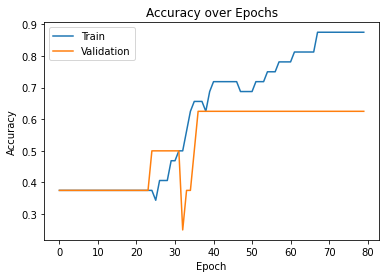

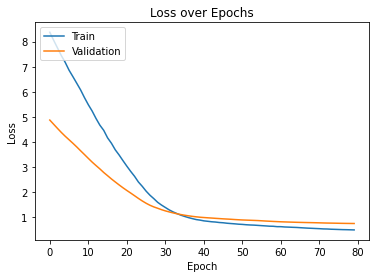

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## KNN ##

In [34]:
dataset = pd.read_excel('/users/kamillaraki/Downloads/REDO-DATA.xlsx')

In [35]:
## Split data into features (X) and target (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [ ]:
#Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

In [38]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [39]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[3 1]
 [0 6]]


In [40]:
# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:\n", cr)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [41]:
# Perform cross-validation to find optimal number of neighbors
k_values = list(range(1, 31))
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

In [42]:
# Find the optimal k
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print("Optimal k:", optimal_k)



Optimal k: 1


In [68]:
# Initialize KNN classifier with optimal k
knn = KNeighborsClassifier(n_neighbors=1)

In [69]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [70]:
# Make predictions on the test dataset
y_pred = knn.predict(X_test)

In [71]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.80


In [72]:
# Perform cross-validation to estimate better the performance
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.875 0.875 0.625 0.875 0.875]
Average cross-validation score: 0.825
